In [11]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '48ad67bd-682f-481e-be26-0549f76b4043',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-05-07T16:43:57.763Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9760}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12059, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [12]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [13]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12059,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.986149e+07,1.986149e+07,False,NaN,1,NaN,NaN,None,2025-05-07T16:42:00.000Z,96691.252870,3.538521e+10,56.4920,-0.484670,2.204361,2.681247,24.099276,12.424952,-0.099618,1.920433e+12,64.5614,2.030516e+12,None,2025-05-07T16:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-07 18:44:12.783925
1,1027,Ethereum,ETH,ethereum,10281,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207324e+08,1.207324e+08,True,NaN,2,NaN,NaN,None,2025-05-07T16:42:00.000Z,1805.652029,1.517941e+10,34.8920,-0.961871,1.997481,1.995168,17.340054,-17.051000,-33.334755,2.180007e+11,7.3288,2.180007e+11,None,2025-05-07T16:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-07 18:44:12.783925
2,825,Tether USDt,USDT,tether,126922,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.494292e+11,1.525107e+11,True,NaN,3,NaN,NaN,None,2025-05-07T16:42:00.000Z,1.000105,5.826625e+10,15.1393,-0.003229,0.012957,0.007448,0.063988,0.052173,-0.006423,1.494449e+11,5.0227,1.525267e+11,None,2025-05-07T16:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-07 18:44:12.783925
3,52,XRP,XRP,xrp,1604,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.850355e+10,9.998618e+10,False,NaN,4,NaN,NaN,None,2025-05-07T16:43:00.000Z,2.118928,2.522882e+09,7.4690,-0.636878,-0.149446,-2.193797,13.446980,-9.084495,-8.105202,1.239648e+11,4.1663,2.118928e+11,None,2025-05-07T16:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-07 18:44:12.783925
4,1839,BNB,BNB,bnb,2512,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408895e+08,1.408895e+08,False,NaN,5,NaN,NaN,None,2025-05-07T16:42:00.000Z,598.448782,1.562817e+09,3.0737,-0.547764,0.084768,0.251659,8.790790,0.115928,4.237747,8.431513e+10,2.8345,8.431513e+10,None,2025-05-07T16:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-07 18:44:12.783925
5,5426,Solana,SOL,solana,912,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.188992e+08,6.002087e+08,True,NaN,6,NaN,NaN,None,2025-05-07T16:42:00.000Z,145.410426,3.203010e+09,30.5971,-0.460319,1.234557,1.737662,38.725175,6.716593,-23.432134,7.545335e+10,2.5366,8.727661e+10,None,2025-05-07T16:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-07 18:44:12.783925
6,3408,USDC,USDC,usd-coin,27638,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.103815e+10,6.103815e+10,False,NaN,7,NaN,NaN,None,2025-05-07T16:42:00.000Z,0.999950,9.399386e+09,9.3907,-0.015991,-0.017098,-0.005685,0.006456,0.011768,-0.002294,6.103509e+10,2.0519,6.103509e+10,None,2025-05-07T16:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-07 18:44:12.783925
7,74,Dogecoin,DOGE,dogecoin,1218,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.491657e+11,1.491657e+11,True,NaN,8,NaN,NaN,None,2025-05-07T16:43:00.000Z,0.169836,6.959318e+08,-8.9177,-0.818963,1.855462,-0.336882,16.287828,-11.704919,-31.380450,2.533371e+10,0.8517,2.533371e+10,None,2025-05-07T16:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-07 18:44:12.783925
8,1958,TRON,TRX,tron,1173,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.491738e+10,9.49174

In [19]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '48ad67bd-682f-481e-be26-0549f76b4043',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Admin\OneDrive\Desktop\DataAnalysisBootcamp Alex\Python\Pandas\API.csv'):
        df.to_csv(r'C:\Users\Admin\OneDrive\Desktop\DataAnalysisBootcamp Alex\Python\Pandas\API.csv', header = 'column_names')
    else:
         df.to_csv(r'C:\Users\Admin\OneDrive\Desktop\DataAnalysisBootcamp Alex\Python\Pandas\API.csv', mode = 'a', header = False)

In [20]:
import os
from time import time
from time import sleep

# 333 calls per day are allowed from the API
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for a minute
exit()

{'status': {'timestamp': '2025-05-08T11:33:22.806Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9756}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12059, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [21]:
df72 = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\DataAnalysisBootcamp Alex\Python\Pandas\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12059,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.986184e+07,1.986184e+07,False,NaN,1,NaN,NaN,NaN,2025-05-08T10:16:00.000Z,99708.772339,5.389183e+10,60.4511,0.097415,2.864160,3.982776,26.357082,16.645825,2.445957,1.980399e+12,64.0081,2.093884e+12,NaN,2025-05-08T10:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 12:55:05.150517
1,1,1027,Ethereum,ETH,ethereum,10281,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207322e+08,1.207322e+08,True,NaN,2,NaN,NaN,NaN,2025-05-08T10:16:00.000Z,1940.589851,2.061124e+10,26.1122,0.156507,5.303357,6.429613,23.675346,-10.360468,-29.229980,2.342917e+11,7.5731,2.342917e+11,NaN,2025-05-08T10:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 12:55:05.150517
2,2,825,Tether USDt,USDT,tether,126994,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.495043e+11,1.535107e+11,True,NaN,3,NaN,NaN,NaN,2025-05-08T10:15:00.000Z,1.000153,7.309174e+10,15.5975,-0.007474,0.005553,-0.043916,0.023811,0.038401,-0.003996,1.495271e+11,4.8332,1.535341e+11,NaN,2025-05-08T10:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-08 12:55:05.150517
3,3,52,XRP,XRP,xrp,1604,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.850355e+10,9.998618e+10,False,NaN,4,NaN,NaN,NaN,2025-05-08T10:16:00.000Z,2.212357,4.686884e+09,106.6445,0.186462,3.265047,-0.303300,17.689008,-2.901819,-6.805462,1.294307e+11,4.1834,2.212357e+11,NaN,2025-05-08T10:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 12:55:05.150517
4,4,1839,BNB,BNB,bnb,2512,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.408894e+08,1.408894e+08,False,NaN,5,NaN,NaN,NaN,2025-05-08T10:20:00.000Z,616.625981,1.707818e+09,8.4375,0.022630,1.889264,1.982666,10.576135,5.865199,5.183774,8.687605e+10,2.8079,8.687605e+10,NaN,2025-05-08T10:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 12:55:05.150517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,10,20947,Sui,SUI,sui,640,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port...",1.000000e+10,3.338327e+09,1.000000e+10,False,NaN,11,3.338327e+09,1.250545e+10,NaN,2025-05-08T11:32:00.000Z,3.746023,2.122175e+09,30.9322,0.434079,10.873505,2.764695,82.078677,54.163324,15.527307,1.250545e+10,0.4047,3.746023e+10,NaN,2025-05-08T11:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-08 13:33:22.688942
341,11,1975,Chainlink,LINK,chainlink,2003,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,6.571000e+08,1.000000e+09,False,NaN,12,NaN,NaN,NaN,2025-05-08T11:32:00.000Z,14.838314,3.373755e+08,19.3983,-0.546596,7.018050,-0.783022,27.738971,0.966952,-23.130892,9.750256e+09,0.3156,1.483831e+10,NaN,2025-05-08T11:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-05-08 13:33:22.688942
342,12,5805,Avalanche,AVAX,avalanche,911,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.179503e+08,4.546198e+08,False,NaN,13,NaN,NaN,NaN,2025-05-08T11:32:00.000Z,20.948117,3.739921e+08,55.2455,-0.729372,6.152697,-2.276115,22.190872,6.234064,-17.652588,8.755271e+09,0.283

In [22]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [25]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.31084,2.63115,3.61687,25.03176,17.33415,1.91322
Ethereum,-0.00562,6.24174,5.68886,23.33507,-9.10893,-29.24197
Tether USDt,-0.01198,-0.00506,-0.01415,0.03398,0.05221,-0.02237
XRP,-0.19929,3.14131,-1.23939,15.01622,-2.27069,-8.33499
BNB,-0.32614,1.30482,1.74126,9.37565,6.28758,4.94955
Solana,-0.78499,4.27449,1.41867,39.92609,12.99227,-22.26053
USDC,-0.01988,-0.03296,-0.01762,-0.02354,0.02356,-0.01730
Dogecoin,-0.48131,5.80228,2.79349,19.70317,-1.23179,-27.92615
Cardano,-0.59004,5.49146,1.97487,21.04948,-7.87364,-2.08286


In [29]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h    -0.31084
              quote.USD.percent_change_24h    2.63115
              quote.USD.percent_change_7d     3.61687
              quote.USD.percent_change_30d   25.03176
              quote.USD.percent_change_60d   17.33415
                                               ...   
Bitcoin Cash  quote.USD.percent_change_24h   12.96253
              quote.USD.percent_change_7d    11.93902
              quote.USD.percent_change_30d   48.04839
              quote.USD.percent_change_60d   11.50807
              quote.USD.percent_change_90d   26.95635
Length: 90, dtype: float64

In [32]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin      quote.USD.percent_change_1h  -0.31084
             quote.USD.percent_change_24h  2.63115
             quote.USD.percent_change_7d   3.61687
             quote.USD.percent_change_30d 25.03176
             quote.USD.percent_change_60d 17.33415
...                                            ...
Bitcoin Cash quote.USD.percent_change_24h 12.96253
             quote.USD.percent_change_7d  11.93902
             quote.USD.percent_change_30d 48.04839
             quote.USD.percent_change_60d 11.50807
             quote.USD.percent_change_90d 26.95635

[90 rows x 1 columns]

In [34]:
df6 = df5.reset_index()
df6.index = pd.Index(range(len(df6)))
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.31084
1,Bitcoin,quote.USD.percent_change_24h,2.63115
2,Bitcoin,quote.USD.percent_change_7d,3.61687
3,Bitcoin,quote.USD.percent_change_30d,25.03176
4,Bitcoin,quote.USD.percent_change_60d,17.33415
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,12.96253
86,Bitcoin Cash,quote.USD.percent_change_7d,11.93902
87,Bitcoin Cash,quote.USD.percent_change_30d,48.04839
88,Bitcoin Cash,quote.USD.percent_change_60d,11.50807


In [35]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.31084
1,Bitcoin,quote.USD.percent_change_24h,2.63115
2,Bitcoin,quote.USD.percent_change_7d,3.61687
3,Bitcoin,quote.USD.percent_change_30d,25.03176
4,Bitcoin,quote.USD.percent_change_60d,17.33415
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,12.96253
86,Bitcoin Cash,quote.USD.percent_change_7d,11.93902
87,Bitcoin Cash,quote.USD.percent_change_30d,48.04839
88,Bitcoin Cash,quote.USD.percent_change_60d,11.50807


In [42]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.31084
1,Bitcoin,24h,2.63115
2,Bitcoin,7d,3.61687
3,Bitcoin,30d,25.03176
4,Bitcoin,60d,17.33415
...,...,...,...
85,Bitcoin Cash,24h,12.96253
86,Bitcoin Cash,7d,11.93902
87,Bitcoin Cash,30d,48.04839
88,Bitcoin Cash,60d,11.50807


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

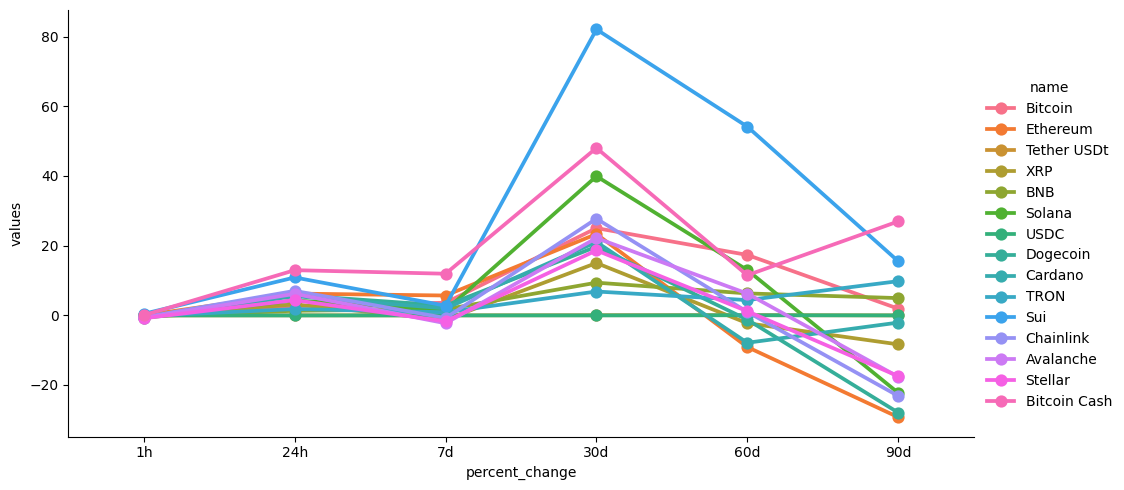

In [43]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point', aspect=2)